# Support vector Machines

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges. 

However,  it is mostly used in classification problems. 

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df= sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


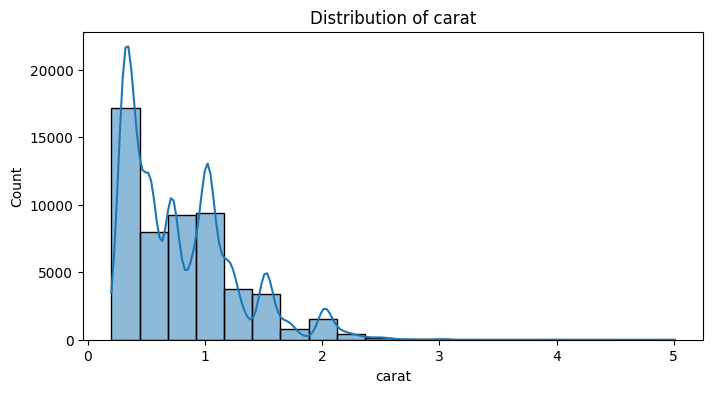

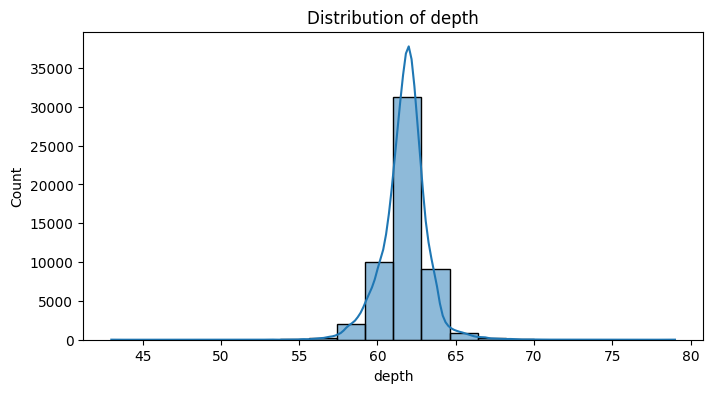

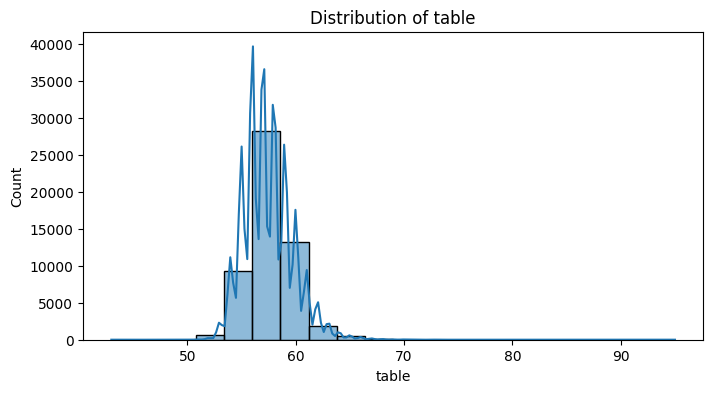

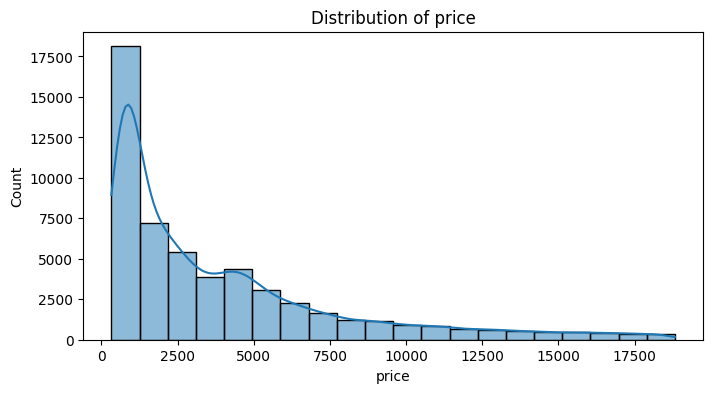

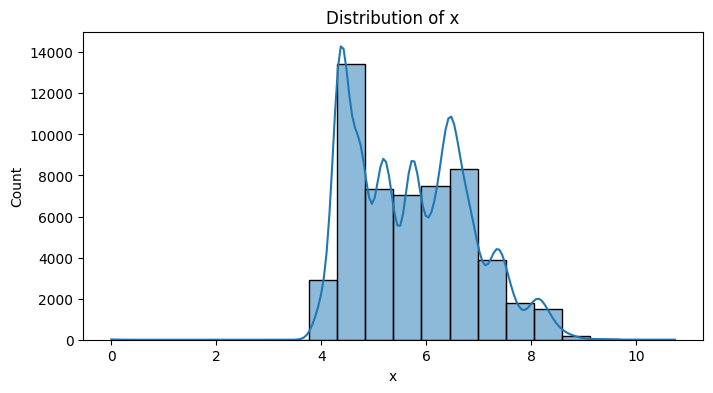

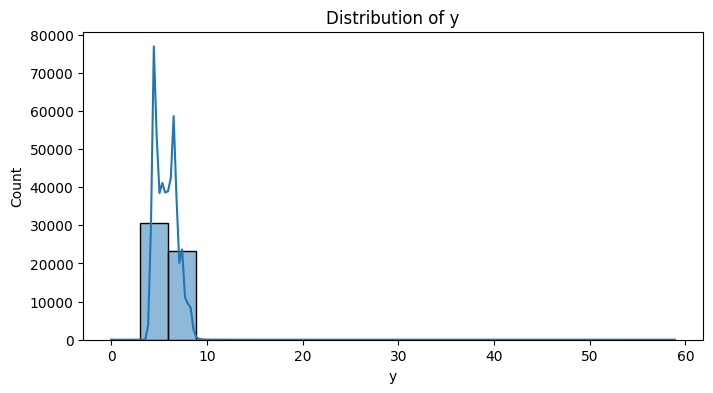

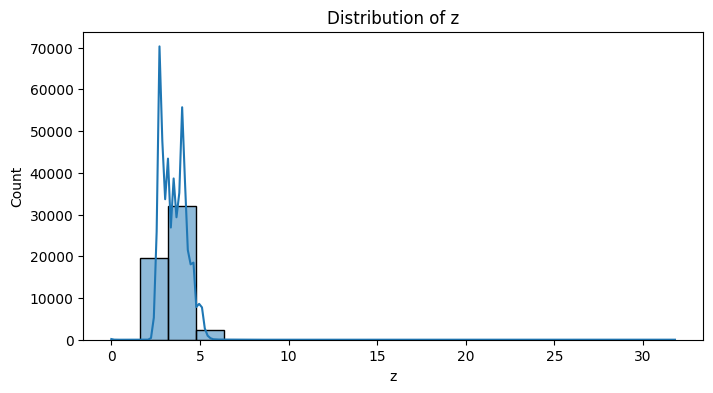

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

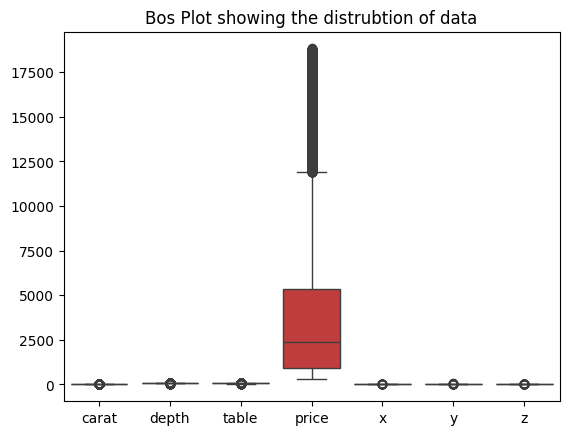

In [5]:
sns.boxplot(data=df)
plt.title("Bos Plot showing the distrubtion of data")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

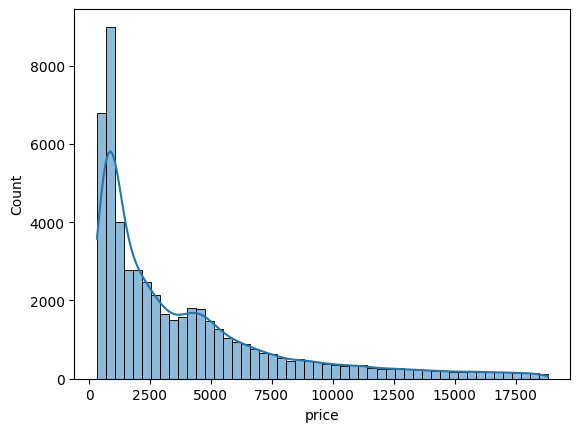

In [6]:
sns.histplot(data= df, x = 'price', kde=True, bins=50)

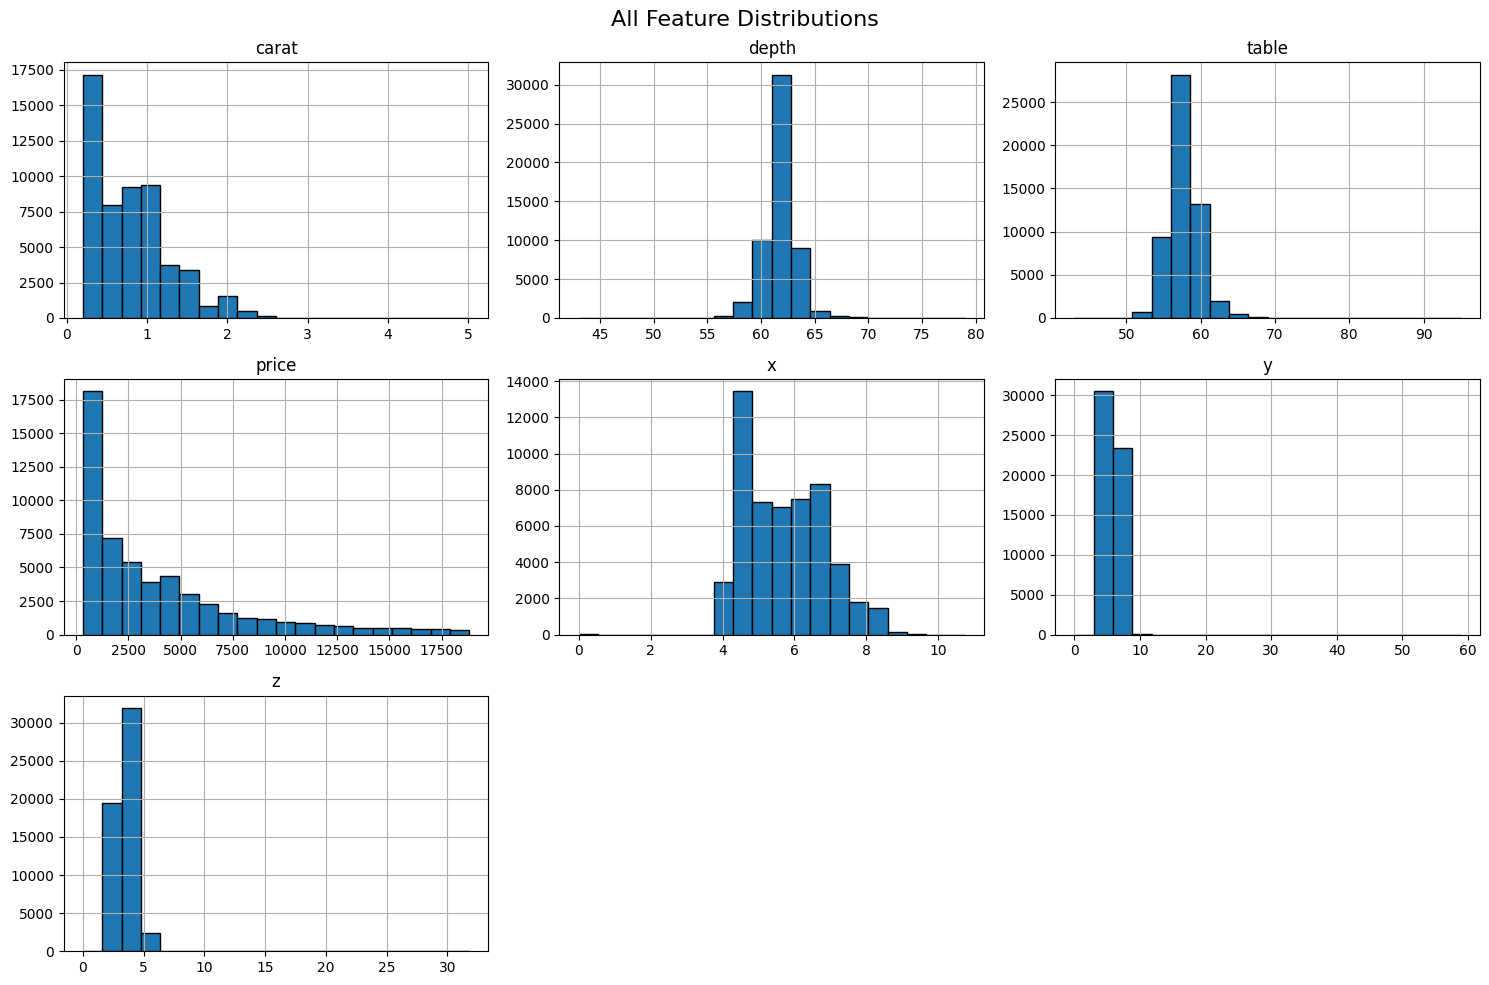

In [7]:
# View all feature distributions in one command
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('All Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

categorical_cols = ["cut", "color", "clarity"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), 
         [col for col in df.columns if col not in categorical_cols + ["price"]])
    ]
)

In [9]:
X = df.drop('price', axis=1)
y = df['price']

X.shape, y.shape

((53940, 9), (53940,))

In [10]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [11]:
from sklearn.model_selection import train_test_split

# Use stratify parameter for classification, random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # This ensures same split every time
)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm", SVR(kernel="rbf"))
])


In [13]:
svm_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__epsilon': [0.01, 0.1, 1],
    'svm__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R²:", grid_search.best_score_)

Best parameters: {'svm__C': 10, 'svm__epsilon': 0.1, 'svm__kernel': 'linear'}
Best cross-validated R²: 0.8971380727828174
